In [2]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation

* focus is always to understand the final data structure
* support each step by visual analytics

## Johns Hopkins GITHUB csv data

## Centers for Civic Impact

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
|-> Infections

https://github.com/govex/COVID-19/blob/a96dbc70eada30e83b1c475a328bb3cab4712741/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv
|-> Vaccinned

In [3]:
data_path = 'https://github.com/CSSEGISandData/COVID-19/blob/246eab67395dce9a4238fff77aa5f3561e253d48/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv?raw=true'
## added ?raw=true to get last value and get the permantlink from Github

data_path1 = 'https://github.com/govex/COVID-19/blob/a96dbc70eada30e83b1c475a328bb3cab4712741/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv?raw=true'
## added ?raw=true to get last value and get the permantlink from Github

In [4]:
# data infections 
pd_raw_inf=pd.read_csv(data_path,)
pd_raw_inf.to_csv('../data/raw/COVID_infections_raw.csv',sep=';');


# data vaccined
pd_raw_vac=pd.read_csv(data_path1,)
pd_raw_vac.to_csv('../data/raw/COVID_vaccines_raw.csv',sep=';');

In [5]:
pd_raw_inf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/7/22,6/8/22,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180741,180784,180864,180864,180864,180864,181120,181178,181236,181465
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276468,276518,276583,276638,276690,276731,276731,276821,276821,276821
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265904,265909,265920,265925,265925,265927,265937,265943,265952,265964
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43067,43224,43224,43224,43224,43224,43224,43224,43449,43449
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [6]:
pd_raw_vac.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
0,Canada,2020-12-14,5.0,0.0,0.0,2020-12-14,124.0,NaN
1,World,2020-12-14,5.0,0.0,0.0,2020-12-14,NaN,NaN
2,Canada,2020-12-15,723.0,0.0,0.0,2020-12-15,124.0,NaN
3,China,2020-12-15,1500000.0,0.0,0.0,2020-12-15,156.0,NaN
4,Russia,2020-12-15,28500.0,28500.0,0.0,2020-12-15,643.0,NaN


# Data for infections COVID

In [7]:
pd_raw_inf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/7/22,6/8/22,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180741,180784,180864,180864,180864,180864,181120,181178,181236,181465
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276468,276518,276583,276638,276690,276731,276731,276821,276821,276821
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265904,265909,265920,265925,265925,265927,265937,265943,265952,265964
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43067,43224,43224,43224,43224,43224,43224,43224,43449,43449
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [8]:
pd_raw_inf.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/7/22', '6/8/22', '6/9/22', '6/10/22', '6/11/22', '6/12/22',
       '6/13/22', '6/14/22', '6/15/22', '6/16/22'],
      dtype='object', length=877)

In [9]:
time_idx=pd_raw_inf.columns[4:]

In [10]:
df_plot= pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [11]:
pd_raw_inf['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [12]:
pd_raw_inf[pd_raw_inf['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
6/12/22    26809245
6/13/22    26915085
6/14/22    27007429
6/15/22    27096571
6/16/22    27124689
Length: 877, dtype: int64

In [13]:
pd_raw_inf[pd_raw_inf['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [14]:
country_list=['Mexico',
              'US',
              'Germany',
             ] 
country_list

['Mexico', 'US', 'Germany']

In [15]:
for each in country_list:
    df_plot[each] = np.array(pd_raw_inf[pd_raw_inf['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [16]:
df_plot

,date,Mexico,US,Germany
0,1/22/20,0,1,0
1,1/23/20,0,1,0
2,1/24/20,0,2,0
3,1/25/20,0,2,0
4,1/26/20,0,5,0
...,...,...,...,...
872,6/12/22,5823844,85515529,26809245
873,6/13/22,5823844,85666440,26915085
874,6/14/22,5833738,85758512,27007429
875,6/15/22,5843190,85941290,27096571


<AxesSubplot:xlabel='date'>

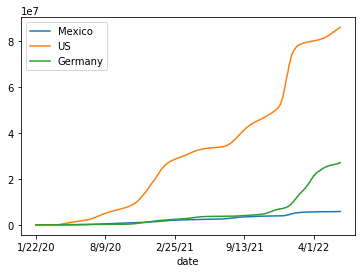

In [17]:
%matplotlib inline
df_plot.set_index('date').plot()

## Population total 

In [29]:
pop = [128.9E6, 329.5E6, 83.24E6]
df_plot.sum(2, axis='columns')


TypeError: sum() got multiple values for argument 'axis'

In [ ]:
df_plot.head(-5)

In [ ]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_idx

In [ ]:
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)
time_str

In [ ]:
df_plot['date']=time_idx
type(df_plot['date'][0])

In [ ]:
df_plot.head()

In [ ]:
df_plot.to_csv('../data/processed/COVID_inf_small_flat_table.csv',sep=';',index=False)

## Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)


A primary key’s main features are:

* It must contain a unique value for each row of data.
* It cannot contain null values.

In [ ]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

In [ ]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing

In [ ]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

In [ ]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()


In [ ]:
pd_relational_model.dtypes

In [ ]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [ ]:
pd_relational_model.dtypes

In [ ]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [ ]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

## Attention due to the new structure of the Johns Hopkins data set the state information US is in a second file

In [ ]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()



In [ ]:
# drop all non relevant fields! 
# Many of this fields do not belong to 
# a transactional data. These fields belong to so called master data
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()


In [ ]:
## the stack command has problems when only one information is available within a stacking level
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

In [ ]:
# update the large relational file

In [ ]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [ ]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [ ]:
pd_relational_model_all.to_csv('../data/processed/20200424_COVID_relational_confirmed.csv',sep=';',index=False)

In [ ]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])

### cross check on full sum US data

In [ ]:
check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']

In [ ]:

check_US[['date','country','confirmed']].groupby(['date','country']).sum()